##### Importing The Librarys 

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Reading the Data set

In [125]:
df = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')

Checking the first five rows of the data

In [126]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


No of Rows and columns of the data

In [127]:
df.shape

(9994, 11)

#### checking the data types of data set

 Order Date columns has problem with data type and date formate

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [129]:
df['Order Date'] = [date.replace('/', '-') for date in df['Order Date']]

In [130]:
df['Order Date'] = [date.strip() for date in df['Order Date']]

In [131]:
df['Order Date'] = pd.to_datetime(df['Order Date'],errors='coerce')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     9994 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 859.0+ KB


#### Feture Engineering -->

In [133]:
df['Order Day'] = df['Order Date'].dt.day

In [134]:
df['Order Month'] = df['Order Date'].dt.month

In [135]:
df['Order Year'] = df['Order Date'].dt.year

#### Checking missing values 

In [136]:
df.isnull().sum()/100

Order ID         0.0
Customer Name    0.0
Category         0.0
Sub Category     0.0
City             0.0
Order Date       0.0
Region           0.0
Sales            0.0
Discount         0.0
Profit           0.0
State            0.0
Order Day        0.0
Order Month      0.0
Order Year       0.0
dtype: float64

In [137]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
Order Day        0
Order Month      0
Order Year       0
dtype: int64

Hence there are no null values and missing values 

#### Checking inconsistence data --->

In [138]:
for cols in df:
    print(df[cols].value_counts())
    print("  ")

Order ID
OD1       1
OD6666    1
OD6659    1
OD6660    1
OD6661    1
         ..
OD3333    1
OD3334    1
OD3335    1
OD3336    1
OD9994    1
Name: count, Length: 9994, dtype: int64
  
Customer Name
Amrish      227
Krithika    224
Verma       218
Arutra      218
Vidya       215
Shah        215
Suresh      212
Surya       209
Harish      208
Hussain     208
Sudeep      207
Komal       206
Veena       205
Mathew      205
Adavan      205
Ridhesh     204
Muneer      204
Peer        204
Veronica    203
Arvind      203
Vinne       203
Sharon      202
Haseena     202
Malik       201
Yusuf       201
Roshan      201
Shree       200
Ravi        200
Jonas       198
Alan        198
James       197
Ram         197
Amy         196
Akash       196
Willams     195
Sheeba      195
Rumaiza     195
Ganesh      193
Esther      189
Sudha       189
Vince       188
Ramesh      188
Sabeela     188
Sundar      187
Aditi       187
Anu         186
Yadav       185
Jackson     182
Kumar       181
Hafiz       174
Na

#### Detetecting Outliers -->

Text(0, 0.5, 'Sales')

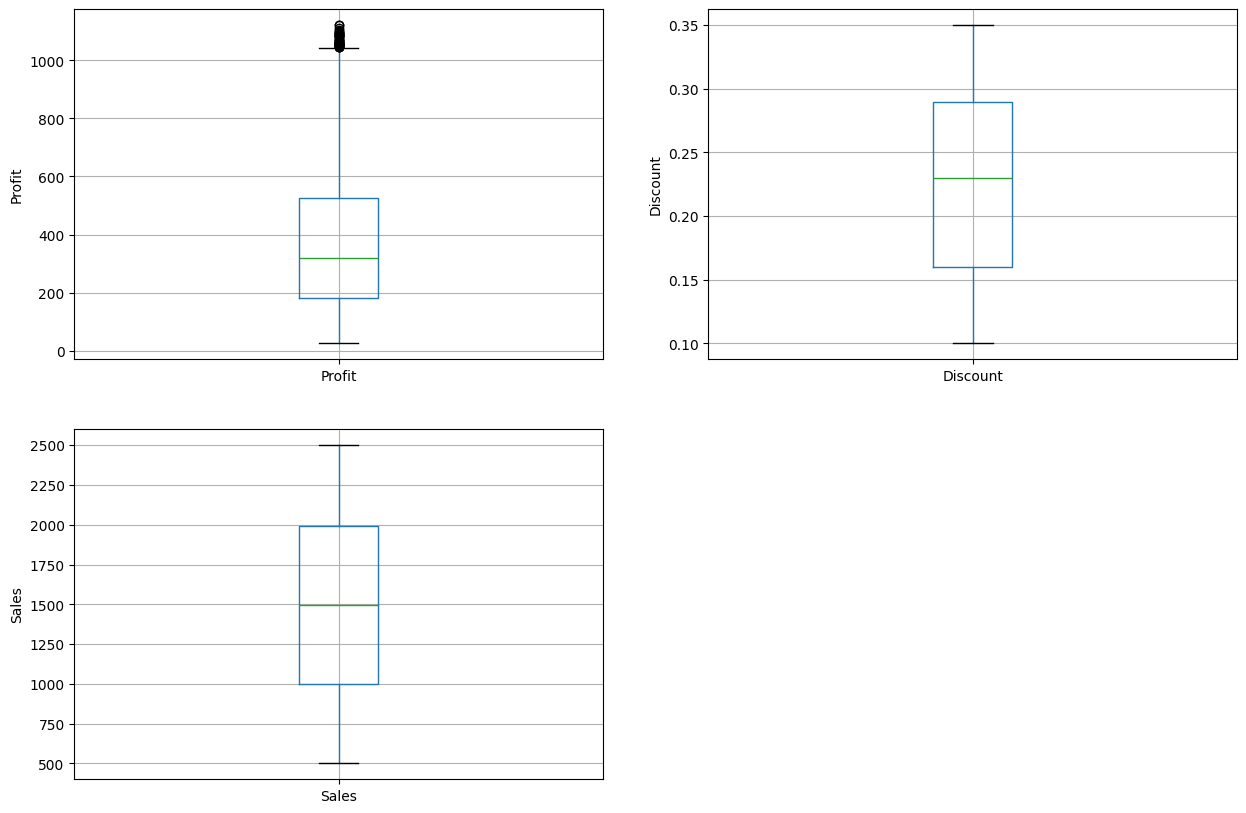

In [139]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='Profit')
fig.set_ylabel('Profit')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='Discount')
fig.set_ylabel('Discount')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='Sales')
fig.set_ylabel('Sales')

#### Removing Outliers by IQR Method --->

In [140]:
q1 = df['Profit'].quantile(0.25)
q3 = df['Profit'].quantile(0.75)

IQR = q3 - q1

Lower_limit = q1 - 1.5 * IQR
Upper_limit = q3 + 1.5 * IQR

In [141]:
Outiers = df[(df['Profit'] >= Lower_limit) & (df['Profit'] <= Upper_limit)]

In [142]:
df['Profit'] = df['Profit'].clip(Lower_limit,Upper_limit)

<Axes: >

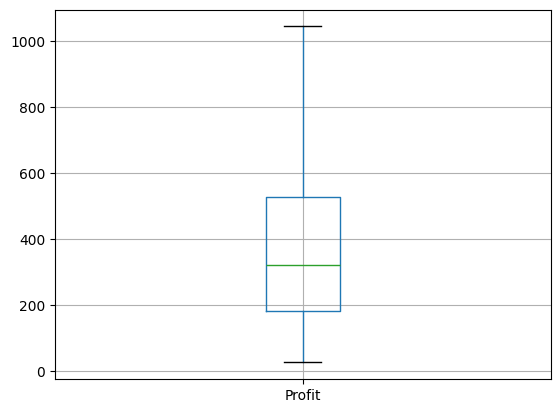

In [143]:
df.boxplot(column='Profit')

#### Checking Duplicate records in dataset -->

checking dupicate after droping primary_key :

In [144]:
Rprim = df.drop(columns=['Order ID'])
Rprim.duplicated().sum()

0

checking dupicate with primary_key :

In [145]:
df.duplicated().sum()

0

### Extarcting the Cleaned Dataset -->

In [146]:
df.to_csv("Cleaned_supermart.csv",index=False)

## Machine Learning Algorithms :
#### Feature Encoding and Feature Scalling are done by the pipeline
##### Predicting Sales

In [147]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler ,minmax_scale
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score
import numpy as np

In [148]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,8,11,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,8,11,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,12,6,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,11,10,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,11,10,2016


#### Train Test Split -->

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
X = df.drop(columns=['Sales','Order ID','Order Date'])
y = df['Sales']

In [151]:
catogorical = X.select_dtypes(include=object)

In [152]:
catogorical.columns

Index(['Customer Name', 'Category', 'Sub Category', 'City', 'Region', 'State'], dtype='object')

In [153]:
numerical = X.select_dtypes(exclude=object)

In [154]:
numerical.columns

Index(['Discount', 'Profit', 'Order Day', 'Order Month', 'Order Year'], dtype='object')

In [155]:
cato = ['Customer Name', 'Category', 'Sub Category', 'City', 'Region', 'State']
numo  = ['Discount', 'Profit', 'Order Day', 'Order Month', 'Order Year']

### LinearRegression

In [156]:
preprocessor = ColumnTransformer(
    transformers=[
         ('num',StandardScaler(),numo),
         ('cat',OneHotEncoder(handle_unknown='ignore'),cato)
])

model = Pipeline([
    ('Preprocessor',preprocessor),
    ('Regression',LinearRegression())
])

In [157]:
X.head()

,Customer Name,Category,Sub Category,City,Region,Discount,Profit,State,Order Day,Order Month,Order Year
0,Harish,Oil & Masala,Masalas,Vellore,North,0.12,401.28,Tamil Nadu,8,11,2017
1,Sudha,Beverages,Health Drinks,Krishnagiri,South,0.18,149.80,Tamil Nadu,8,11,2017
2,Hussain,Food Grains,Atta & Flour,Perambalur,West,0.21,165.20,Tamil Nadu,12,6,2017
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,South,0.25,89.60,Tamil Nadu,11,10,2016
4,Ridhesh,Food Grains,Organic Staples,Ooty,South,0.26,918.45,Tamil Nadu,11,10,2016


In [158]:
y.head()

0    1254
1     749
2    2360
3     896
4    2355
Name: Sales, dtype: int64

In [159]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2 ,random_state=42) 

In [160]:
model.fit(x_train,y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Discount', 'Profit',
                                                   'Order Day', 'Order Month',
                                                   'Order Year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Customer Name', 'Category',
                                                   'Sub Category', 'City',
                                                   'Region', 'State'])])),
                ('Regression', LinearRegression())])

##### Machine Predicted values ---->

In [161]:
y_pred = model.predict(x_test)

##### Actual Values ---->

In [162]:
y_test

3125     523
1441    1301
4510    1154
39      2045
4509     639
        ... 
9956    2098
1561    2484
1670    1624
6951     824
3910     624
Name: Sales, Length: 1999, dtype: int64

In [163]:
mse = mean_squared_error(y_test,y_pred)
mse

216339.53726253123

In [164]:
mean_absolute_error(y_test,y_pred)

383.16738220255706

In [165]:
rmse = np.sqrt(mse)
rmse

465.1231420414719

In [166]:
r2_score(y_test,y_pred)*100

34.40611148177651

### RandomForestRegressor

In [167]:
preprocessor2 = ColumnTransformer(
    transformers=[
         ('num',StandardScaler(),numo),
         ('cat',OneHotEncoder(handle_unknown='ignore'),cato)
])

model2 = Pipeline([
    ('Preprocessor',preprocessor2),
    ('Regression',RandomForestRegressor())
])

In [168]:
model2.fit(x_train,y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Discount', 'Profit',
                                                   'Order Day', 'Order Month',
                                                   'Order Year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Customer Name', 'Category',
                                                   'Sub Category', 'City',
                                                   'Region', 'State'])])),
                ('Regression', RandomForestRegressor())])

In [169]:
y_pred2 = model2.predict(x_test)

In [170]:
mean_squared_error(y_test,y_pred2)

221582.4940334667

In [171]:
rmse2 = np.sqrt(mean_squared_error(y_test,y_pred2))
rmse2

470.7254975391355

In [172]:
mean_squared_error(y_test,y_pred2)

221582.4940334667

In [173]:
r2_score(y_test,y_pred2)*100

32.816453270012516

### GradientBoostingRegressor

In [174]:
preprocessor3 = ColumnTransformer(
    transformers=[
         ('num',StandardScaler(),numo),
         ('cat',OneHotEncoder(handle_unknown='ignore'),cato)
])

model3 = Pipeline([
    ('Preprocessor',preprocessor3),
    ('Regression',GradientBoostingRegressor())
])

In [175]:
model3.fit(x_train,y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Discount', 'Profit',
                                                   'Order Day', 'Order Month',
                                                   'Order Year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Customer Name', 'Category',
                                                   'Sub Category', 'City',
                                                   'Region', 'State'])])),
                ('Regression', GradientBoostingRegressor())])

In [176]:
y_pred3 = model3.predict(x_test)

In [177]:
r2_score(y_test,y_pred3)*100

35.91803938405052

### Hyperparameter Tunning --->

In [182]:
dummies = pd.get_dummies(df,columns=['Customer Name', 'Category', 'Sub Category', 'City', 'Region', 'State'],drop_first=True)

In [185]:
for col in dummies.columns:
    if pd.api.types.is_numeric_dtype(dummies[col]) and not pd.api.types.is_datetime64_any_dtype(dummies[col]):
        dummies[col] = dummies[col].astype(int)

In [225]:
dummies.head()

,Order ID,Order Date,Sales,Discount,Profit,Order Day,Order Month,Order Year,Customer Name_Aditi,Customer Name_Akash,...,City_Theni,City_Tirunelveli,City_Trichy,City_Vellore,City_Viluppuram,City_Virudhunagar,Region_East,Region_North,Region_South,Region_West
0,OD1,2017-11-08,1254,0,401,8,11,2017,0,0,...,0,0,0,1,0,0,0,1,0,0
1,OD2,2017-11-08,749,0,149,8,11,2017,0,0,...,0,0,0,0,0,0,0,0,1,0
2,OD3,2017-06-12,2360,0,165,12,6,2017,0,0,...,0,0,0,0,0,0,0,0,0,1
3,OD4,2016-10-11,896,0,89,11,10,2016,0,0,...,0,0,0,0,0,0,0,0,1,0
4,OD5,2016-10-11,2355,0,918,11,10,2016,0,0,...,0,0,0,0,0,0,0,0,1,0


In [191]:
X = dummies.drop(columns=['Order ID','Order Date','Sales'])
y = dummies['Sales']

In [222]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

lr_regressor = LinearRegression()
lr_regressor.fit(X_train,y_train)
lr_prediction = lr_regressor.predict(X_test)
lr_mse = mean_squared_error(y_test,lr_prediction)
print(f"Mean Squard Error of Linear Regression :{lr_mse}")
lr_r2 = r2_score(y_test,lr_prediction)*100
lr_mae = mean_absolute_error(y_test,lr_prediction)
lr_rmse = np.sqrt(lr_mse)


rf_regressor = RandomForestRegressor(n_estimators=100,random_state=162)
rf_regressor.fit(X_train,y_train)
rf_prediction = rf_regressor.predict(X_test)
rf_mse = mean_squared_error(y_test,rf_prediction)
print(f"Mean Squard Error of Random Forest Regressor :{rf_mse}")
rf2score = r2_score(y_test,rf_prediction)*100
rf_mae = mean_absolute_error(y_test,rf_prediction)
rf_rmse = np.sqrt(rf_mse)


gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(X_train,y_train)
gb_prediction = gb_regressor.predict(X_test)
gb_mse = mean_squared_error(y_test,gb_prediction)
print(f"Mean Squard Error of Gradient Boosting Regressor :{gb_mse}")
gb_r2 = r2_score(y_test,gb_prediction)*100
gb_mae = mean_absolute_error(y_test,gb_prediction)
gb_rmse = np.sqrt(gb_mse)

Mean Squard Error of Linear Regression :216369.0975770302
Mean Squard Error of Random Forest Regressor :223219.18419809904
Mean Squard Error of Gradient Boosting Regressor :210373.19939128187


In [221]:
print(f"Mean Absolute Error of Linear Regression :{lr_mae}")
print(f"Mean Absolute Error of Random Forest Regressor :{rf_mae}")
print(f"Mean Absolute Error of Gradient Boosting Regressor :{gb_mae}")

Mean Absolute Error of Linear Regression :383.19318649803415
Mean Absolute Error of Random Forest Regressor :383.76600300150074
Mean Absolute Error of Gradient Boosting Regressor :377.92633700436664


In [223]:
print(f"Root Mean Absolute Error of Linear Regression :{lr_rmse}")
print(f"Root Mean Absolute Error of Random Forest Regressor :{rf_rmse}")
print(f"Root Mean Absolute Error of Gradient Boosting Regressor :{gb_rmse}")

Root Mean Absolute Error of Linear Regression :465.15491782526624
Root Mean Absolute Error of Random Forest Regressor :472.4607753010815
Root Mean Absolute Error of Gradient Boosting Regressor :458.66458266502536


In [218]:
print(f"Linear Regression R² Score: {lr_r2}")
print(f"Random Forest Regressor R² Score : {rf2score}")
print(f"Gradient Boosting Regressor R² Score :{gb_r2}")

Linear Regression R² Score: 34.39714882983438
Random Forest Regressor R² Score : 32.320210772888714
Gradient Boosting Regressor R² Score :36.21509797652838


## Conclusion :
### From the machine learning model:
##### the best result was from the Gradient Boosting Regressor of from train test split 20% testing and remaing for trainig
##### from Gradient Boosting Regressor model was 36 % of Accuracy
##### After Hyperparameter Tunning of Random Forest Regressor was 32 % of Accuracy  
##### and remaining of Linear Regression 34 % of accuracy  
##### from Gradient boosting regressor was 36 % of accuracy